## PHASE 3 PROJECT

## Syriatel Customer Churn Classification Project

## 1) BUSINESS UNDERSTANDING

## Business Problem

Syriatel's major challenge is losing customers leading to revenue loss,negative brand perception and increased acquisition costs. It aims at reducing customer churn (customers leaving the network). The management would like to understand the factors that drive churn and create a model that predict it accurately hence helping Syriatel take targeted actions to retain valuable customers.
This project aims to develop a machine learning model to predict whether a customer is likely to churn based on various usage patterns, demographic data, and service-related factors.

## Business objectives

- To build a classifier to determine if a customer would ‘soon’ leave SyriaTel, 
- To Identify Customers at High Risk of Leaving Syriatel.  
- To Determine Key Churn Factors.  
- To Identify Reasons for Customer Churn.  
- To Develop a Predictive Churn Model.  
- To Evaluate and Compare Model Performance.  
- To Implement a Churn Prevention Action Plan.  
- To Design Effective Retention Strategies.  
- To Monitor and Measure Plan Effectiveness.  


## Business Questions



1. Which customers are most likely to leave Syriatel?  
2. What are the primary reasons customers churn?  
3. Which factors (e.g., call usage, data usage, billing issues, customer support interactions) influence churn the most?  
4. How can we predict customer churn accurately using historical data?  
5. How do different machine learning models compare in predicting churn?  
6. What proactive strategies can be implemented to reduce churn?  
7. Which customer segments have the highest churn rates, and why?  
8. How effective are current customer retention eustomers?  
10. How does churn impact overall revenue, and what is the potential financial benefit of reducinng processes?  


## Success Criteria  

- The dataset should be cleues.  
- The dataset should have properly preprocessed categorical and numerical features.  
- The machine learning model should achieve at least 85% accuracy to ensure reliable predictions.  
- The model should have an F1-score above 80% to balance precision and recall.  
- The ROC-AUC score should exceed 0.85, indicating strong classification performance.  
- The model should effectively identify key churn factors influencing customer retention.  
- The insights from the model should be actionable for reducing customer churn.  
d highlight


# Importing relevant libraries

In [2]:
#Importing relevant libraries to be used.

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.graph_objs as go
import plotly.express as px

# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [3]:
#loading the dataset
df = pd.read_csv("Syriatel_churn.csv")
#making a copy of the dataset
df1 = df.copy(deep = True)
#checking the first 5 rows
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [177]:
#summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [178]:
#checking for the number of rows and columns
df.shape

(3333, 21)

In [179]:
#Checking numerical coluprint(df.select_dtypes(include=['number']).columns)
print(df.select_dtypes(include=['number']).columns)

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')


In [180]:
#Checking non-numerical columns
print(df.select_dtypes(include=['object']).columns)

Index(['state', 'phone number', 'international plan', 'voice mail plan'], dtype='object')


## 2.DATA PREPARATION/CLEANING

In [181]:
#checking for null values
df.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

#### No null values found on the data set

In [182]:
#checking for duplicates 
df.duplicated().sum()

0

#### No duplicates found on the data set

In [183]:
#checking for unique values 

for dataset in df:
    print("For {},{} unique values present".format(dataset,df[dataset].nunique()))

For state,51 unique values present
For account length,212 unique values present
For area code,3 unique values present
For phone number,3333 unique values present
For international plan,2 unique values present
For voice mail plan,2 unique values present
For number vmail messages,46 unique values present
For total day minutes,1667 unique values present
For total day calls,119 unique values present
For total day charge,1667 unique values present
For total eve minutes,1611 unique values present
For total eve calls,123 unique values present
For total eve charge,1440 unique values present
For total night minutes,1591 unique values present
For total night calls,120 unique values present
For total night charge,933 unique values present
For total intl minutes,162 unique values present
For total intl calls,21 unique values present
For total intl charge,162 unique values present
For customer service calls,10 unique values present
For churn,2 unique values present


In [184]:
# clean up column names
df.columns = df.columns.str.replace(' ', '_')

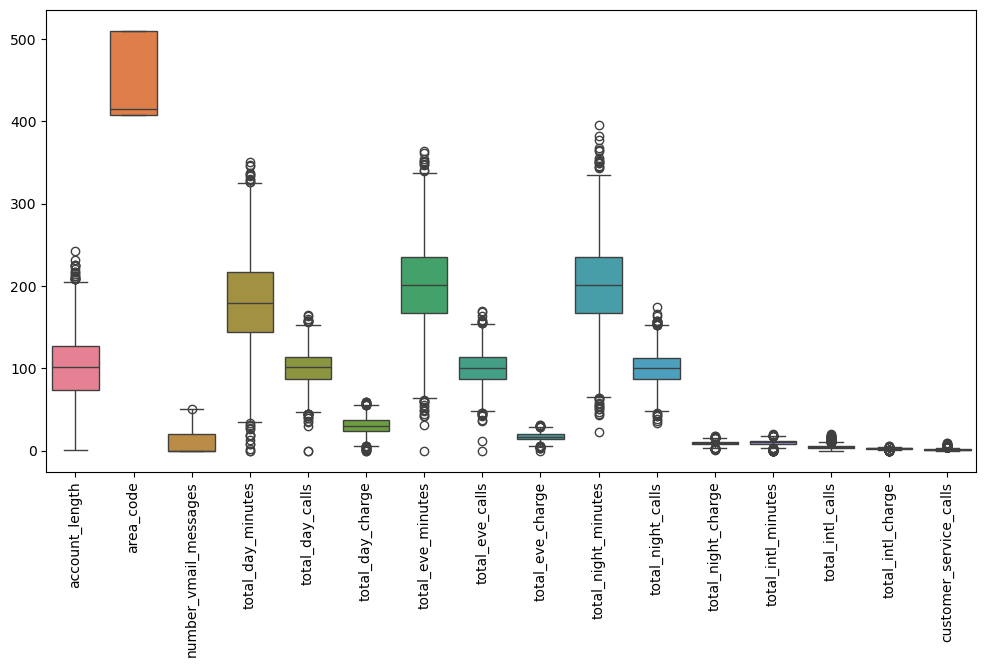

In [185]:
# Checking for outliers
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_df)
plt.xticks(rotation=90)
plt.show()

## 3.DATA ANALYSIS

## 3.1 Univariate Analysis

### Focus would be on the target variable churn rate

In [186]:
#Check total count of current customers that have churned (True) and those that didn't (False)
print(df.churn.value_counts())

churn
False    2850
True      483
Name: count, dtype: int64


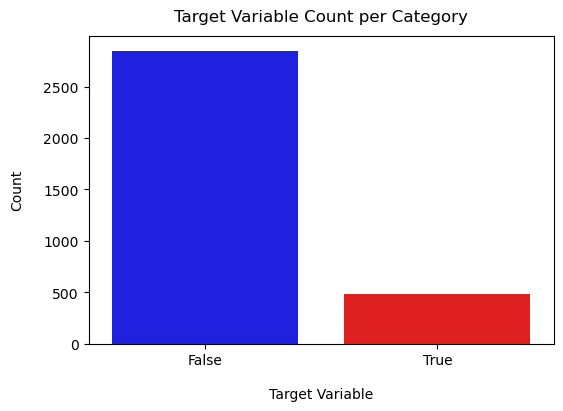

In [4]:

# Countplot using seaborn
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='churn', palette=['blue', 'red'])
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Variable Count per Category", y=1.02)
plt.show()

In [188]:
# checking the unique values of the categorical variables

print(df['churn'].unique())
print(df['international_plan'].unique())
print(df['voice_mail_plan'].unique())
print(df['customer_service_calls'].unique())
print(df['area_code'].unique())

[False  True]
['no' 'yes']
['yes' 'no']
[1 0 2 3 4 5 7 9 6 8]
[415 408 510]


In [5]:
#Checking percent of current customers that have churned (True) and those that didn't (False)
df["churn"].value_counts(normalize=True) * 100

churn
False    85.508551
True     14.491449
Name: proportion, dtype: float64

This means:

85.51% of the customers did not churn.
14.49% of the customers churned.


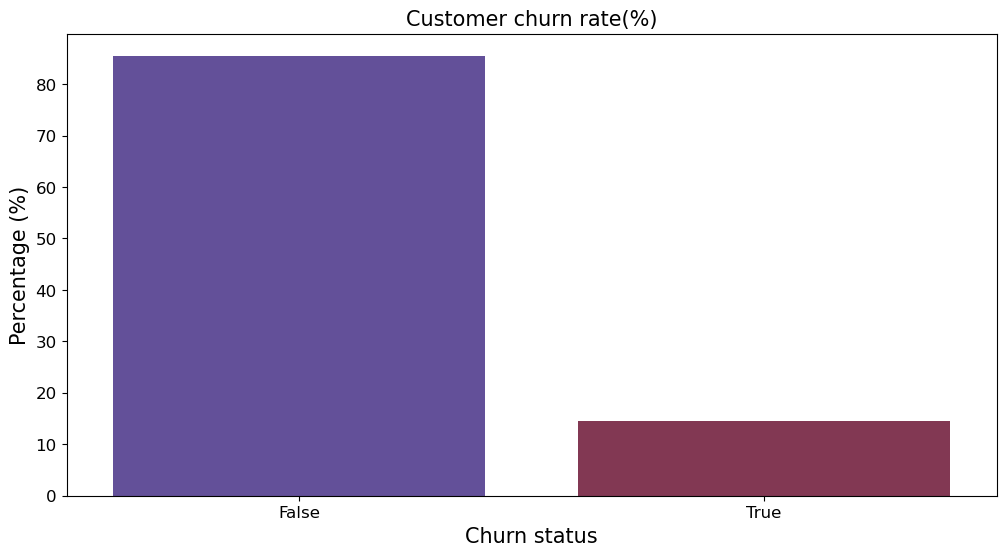

In [190]:
# Calculate churn rate
churn_rate = df['churn'].value_counts(normalize=True) * 100

# Plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=churn_rate.index, y=churn_rate.values, palette='twilight')
plt.xlabel("Churn status", fontsize=15)
plt.ylabel("Percentage (%)", fontsize=15)
plt.title("Customer churn rate(%)", fontsize=15)
plt.xticks(ticks=[0, 1], labels=["False", "True"], fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Based on the results, the data shows a significant imbalance.Before modeling, it's important to deal with this imbalance in the data, as unbalanced features can lead the model to make inaccurate predictions.

In [191]:
def plot_categorical_distribution(data, feature):
    """
    Plots the distribution of a categorical feature in the given data using seaborn.
    """
    plt.figure(figsize=(12, 8))
    sns.countplot(x=feature, data=data, color='orange', order=data[feature].value_counts().index)
    plt.xticks(rotation=90)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title(f"Distribution of {feature}", fontsize=16)
    plt.show()

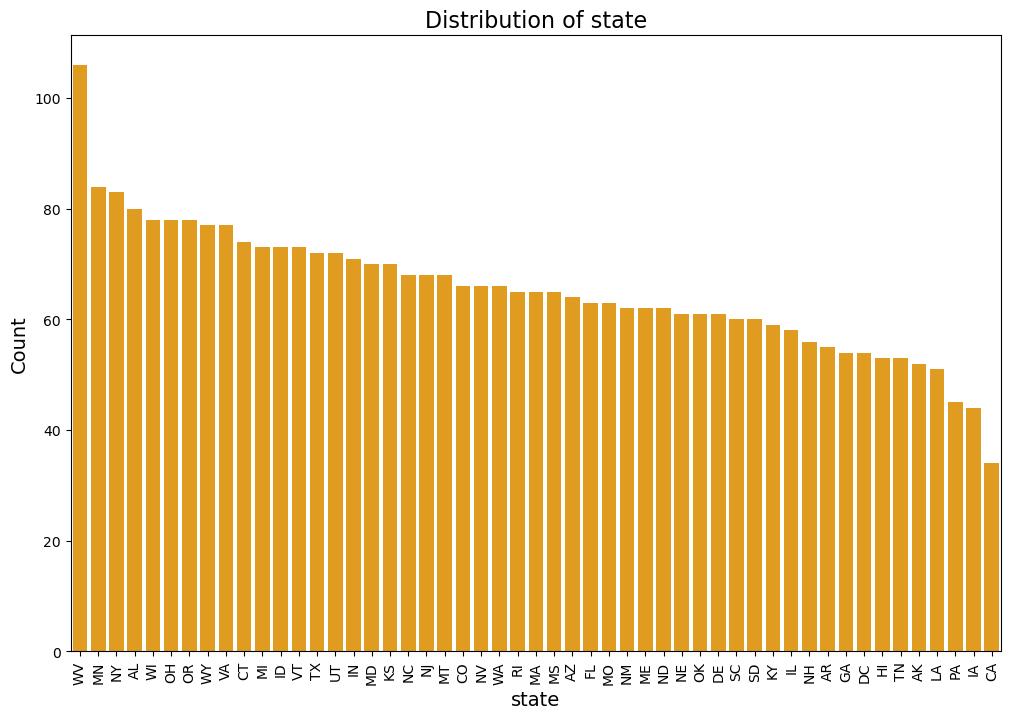

In [192]:
plot_categorical_distribution(df,feature='state')

From the visualizaton above the states with highest customers are West Virginia and Wisconsin while Carlifonia has the lowest number of customers.

## 3.2 Bivariate Analysis

Let's analyze the data by grouping it according to "State" to identify any trends or patterns, such as which states exhibit the highest churn rates.

In [193]:
#groups states and looks at churn and not churn rates 
states = df.groupby('state')['churn'].value_counts(normalize=True)
states = pd.DataFrame(states)
states.columns = ['percent']
states = states.reset_index()
states

,state,churn,percent
0,AK,False,0.942308
1,AK,True,0.057692
2,AL,False,0.900000
3,AL,True,0.100000
4,AR,False,0.800000
...,...,...,...
97,WI,True,0.089744
98,WV,False,0.905660
99,WV,True,0.094340
100,WY,False,0.883117


The table above displays the retention rates of different states in descending order.

### Distribution of the numerical features

#### Histogram subplots  for numeric features

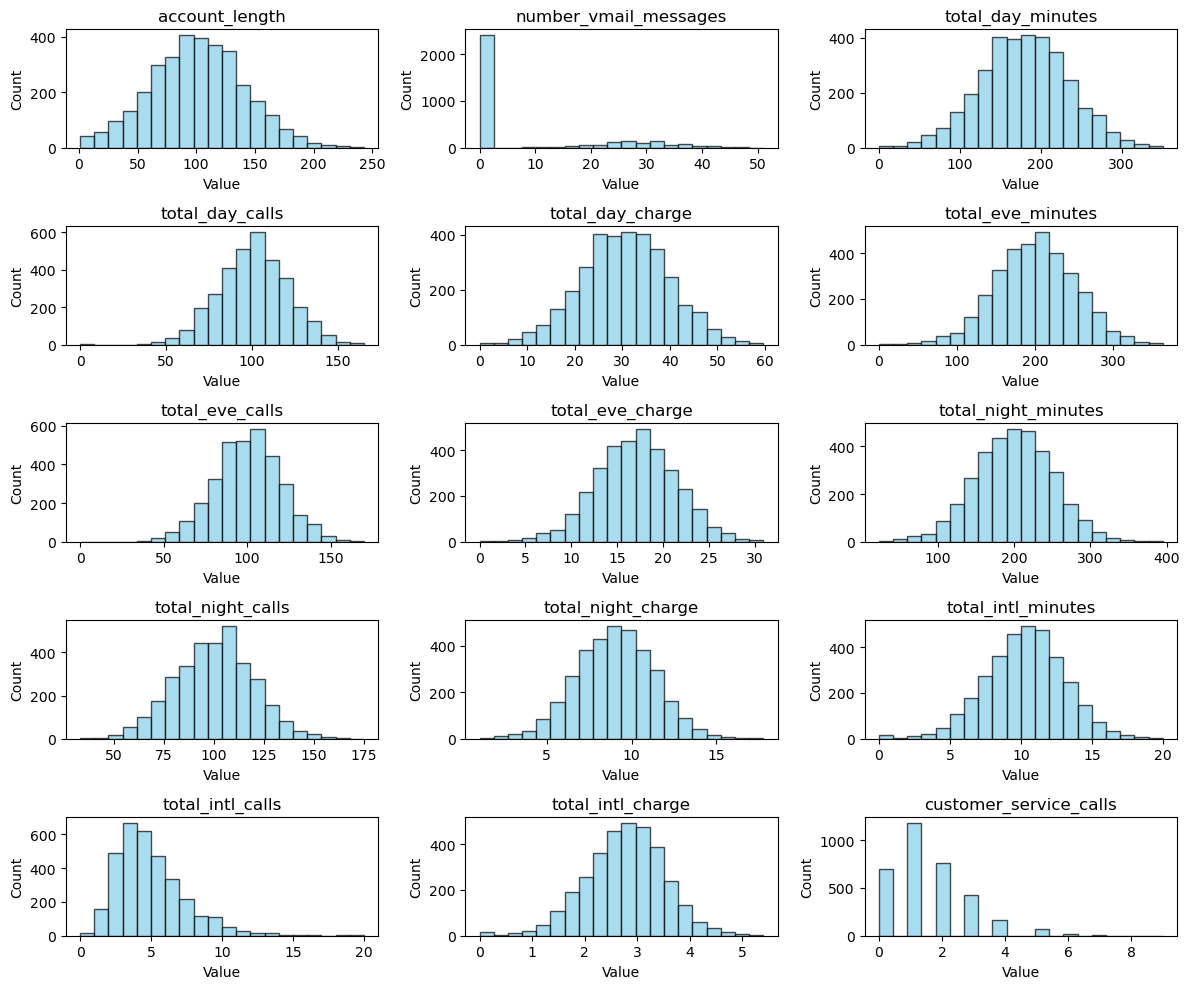

In [194]:
numeric_features = ['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
 'total_night_minutes', 'total_night_calls', 'total_night_charge',
 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'customer_service_calls']

# Create subplots
fig, axes = plt.subplots(nrows=(len(numeric_features) - 1) // 3 + 1, ncols=3, figsize=(12, 10))

# Flattening the axes
axes = axes.flatten()

# Plotting histograms
for i, feature in enumerate(numeric_features):
    axes[i].hist(df[feature], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    axes[i].set_title(feature)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Count')
    plt.tight_layout()
    # Adjust subplot spacing
plt.show()

Account Length:
The distribution is positively skewed, indicating that most customers have shorter account lengths. This could lead to potential challenges in churn prediction, as shorter account lengths are more prevalent, but longer account lengths might serve as more significant indicators of customer retention or churn behavior.

Number of Voice Mail Messages:
The distribution is relatively even, suggesting that this feature doesn't have a strong predictive power for churn. The lack of variation in voice mail usage may limit its utility in differentiating between customers who are likely to churn versus those who are not.

Total Day Minutes, Calls, and Charge:
These features exhibit a positive skew with significant overlap between churned and retained customers. This suggests that while most customers have moderate usage during the day, there is a considerable overlap between the two groups, introducing noise in churn predictions. More advanced techniques or transformations might be necessary to better capture patterns in this data.

Total Evening Minutes, Calls, and Charge:
Similar to the Day features, the distribution is positively skewed and shows significant overlap between churned and retained customers. This further reinforces the idea that the evening usage patterns are not easily distinguishable between the two groups, adding noise that might reduce the effectiveness of these features in predicting churn.

Total Nighttime Minutes, Calls, and Charge:
The negative skew in these distributions suggests that most customers have lower activity during nighttime hours. Higher nighttime usage could serve as a more reliable predictor for churn, as customers with higher nighttime activity might be more engaged or dependent on their service, potentially indicating higher loyalty or retention.

Total International Minutes, Calls, and Charge:
These features share similar distributions to the Total Day features, with a positive skew and significant overlap between churned and non-churned customers. The overlap between classes introduces noise, which might require additional feature engineering or a more refined model to extract meaningful predictive signals.

### Boxplot of customer service calls by churn and area code

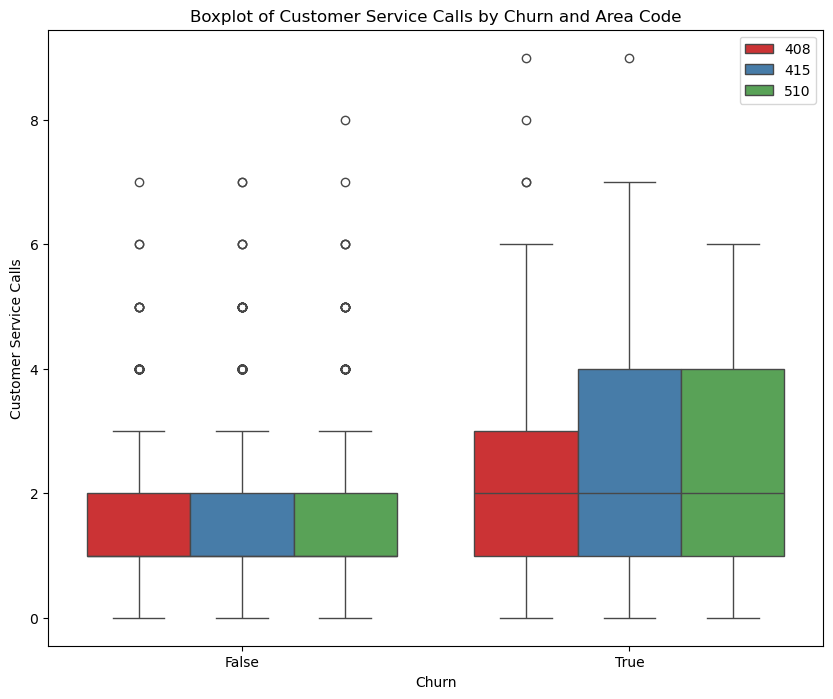

In [195]:
#Boxplot of customer service calls by churn and area code
fig, ax = plt.subplots(figsize=(10, 8))

# Define the boxplot parameters
boxplot_params = {
    'x': 'churn',
    'y': 'customer_service_calls',
    'hue': 'area_code',
    'data': df,
    'palette': 'Set1' 
}

# Plot the boxplot
sns.boxplot(**boxplot_params, ax=ax)
plt.legend(loc='upper right')
plt.title('Boxplot of Customer Service Calls by Churn and Area Code')
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')
plt.show()

The boxplot suggests that a significant portion of customers who terminated their contracts belong to area codes 415 and 510. Additionally, there are numerous outliers present in the dataset.

### Boxplot to compare the total day minutes of customers who stayed and those who churned.



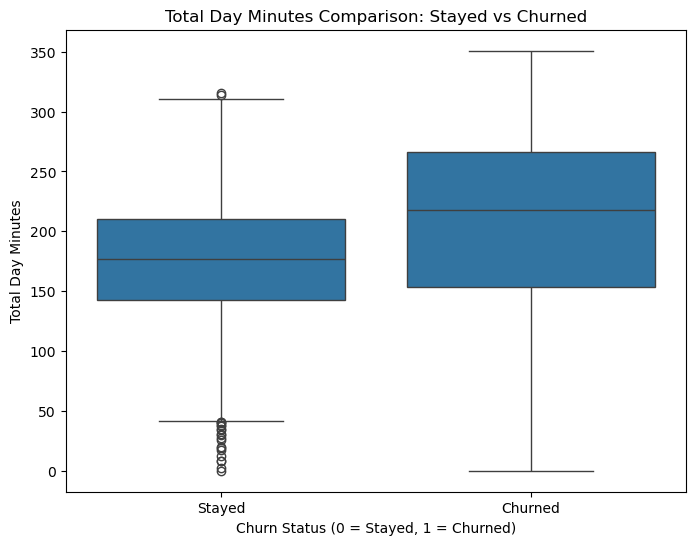

In [196]:
# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total_day_minutes', data=df)
plt.title('Total Day Minutes Comparison: Stayed vs Churned')
plt.xlabel('Churn Status (0 = Stayed, 1 = Churned)')
plt.ylabel('Total Day Minutes')
plt.xticks([0, 1], ['Stayed', 'Churned'])  # Labeling the x-axis
plt.show()

The box plot above shows that customers who spent more time on the phone during the day are more likely to churn.

### Boxplot of churn vs customer service calls

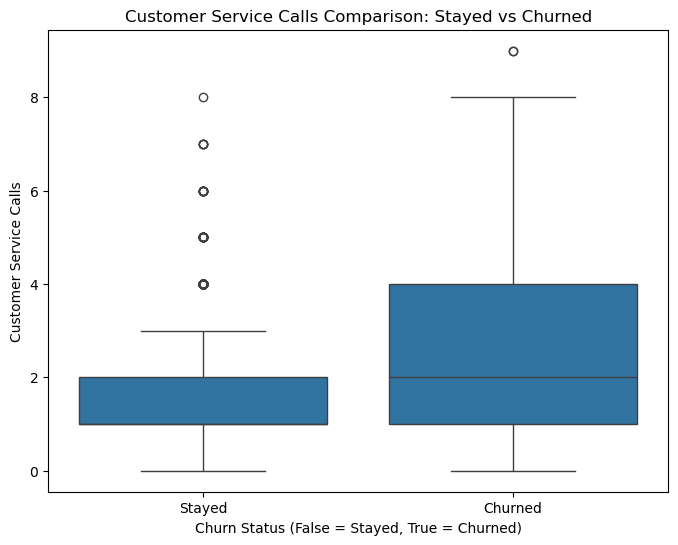

In [197]:
# Plotting the boxplot for churn vs customer service calls
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='customer_service_calls', data=df)
plt.title('Customer Service Calls Comparison: Stayed vs Churned')
plt.xlabel('Churn Status (False = Stayed, True = Churned)')
plt.ylabel('Customer Service Calls')
plt.xticks([0, 1], ['Stayed', 'Churned'])  # Labeling the x-axis

# Show the plot
plt.show()


### Distribution of Customer Service Calls for Churned vs Stayed

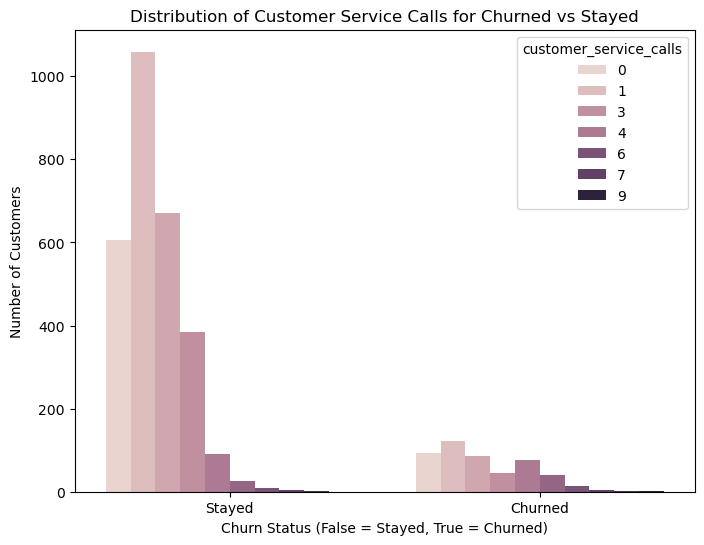

In [198]:
# Plotting the bar graph for churn vs customer service calls
plt.figure(figsize=(8, 6))
sns.countplot(x='churn', hue='customer_service_calls', data=df)

# Customizing the plot
plt.title('Distribution of Customer Service Calls for Churned vs Stayed')
plt.xlabel('Churn Status (False = Stayed, True = Churned)')
plt.ylabel('Number of Customers')
plt.xticks([0, 1], ['Stayed', 'Churned'])  # Labeling the x-axis

# Show the plot
plt.show()


The above bar graph shows that most churners called least times unlike those who stayed. This implies that if a customer calls even just once, it should be taken as an opportunity to make sure they are satisfied with their service

In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   object 
 5   voice_mail_plan         3333 non-null   object 
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [200]:
summary = df.groupby(['state'])['phone_number'].count()
top8 = summary.nlargest(10)
top8

state
WV    106
MN     84
NY     83
AL     80
OH     78
OR     78
WI     78
VA     77
WY     77
CT     74
Name: phone_number, dtype: int64

From the above we can see the top 10 states that had the highest number of customers

In [201]:
def plot_categorical_distribution(df, feature):
    """
    Plots the distribution of a categorical feature based on churn rate in the given data.
    """
    plt.figure(figsize=(10, 4))
    
    # Calculate churn rate for each category
    churn_rate = df.groupby(feature)["churn"].mean().sort_values(ascending=False)
    
    # Select top 8 categories based on churn rate
    top_8_categories = churn_rate.head(8).index.tolist()
    
    # Plot countplot with churn distribution
    sns.countplot(x=feature, hue="churn", data=df, order=top_8_categories)
    
    plt.xticks(rotation=90)
    plt.legend(loc="upper right")
    plt.title(f'Distribution of {feature} based on Churn Rate')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

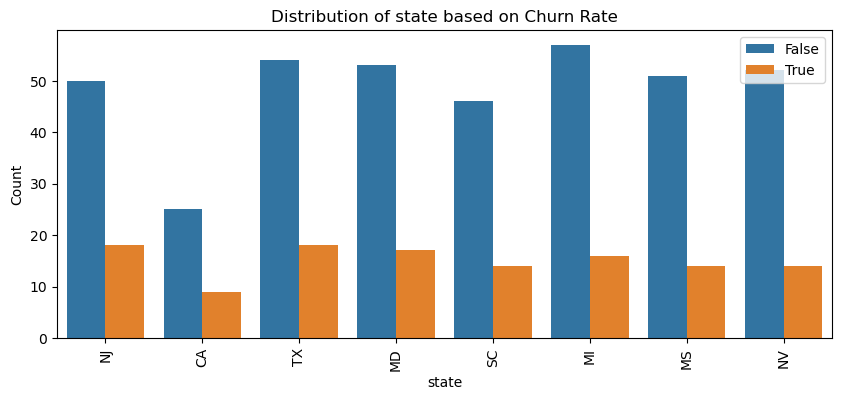

In [202]:
plot_categorical_distribution(df, 'state')

Customers that churned, majority are from Texas, New Jersey, Maryland and Miami

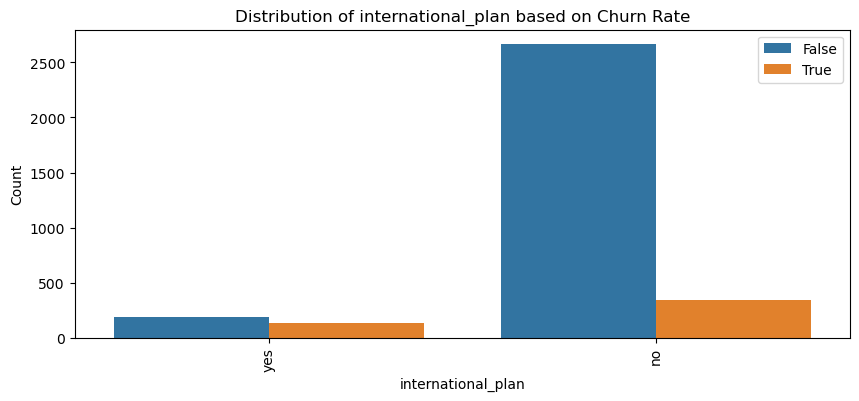

In [203]:
plot_categorical_distribution(df, 'international_plan')

The histogram ndicates that most of the customers who terminated their contracts did not have an international plan.

In [204]:
def plot_churn_kde(df, x_column, charge_type):
    """
    A function to plot features based on churn rate
    """
    plt.figure(figsize=(8, 6))
    sns.kdeplot(data=df, x=x_column, hue='churn', fill=True)
    plt.xlabel(f'Total {charge_type} Charge')
    plt.ylabel('Density')
    plt.title(f'Churn Distribution by {charge_type} Charges')
    plt.show()

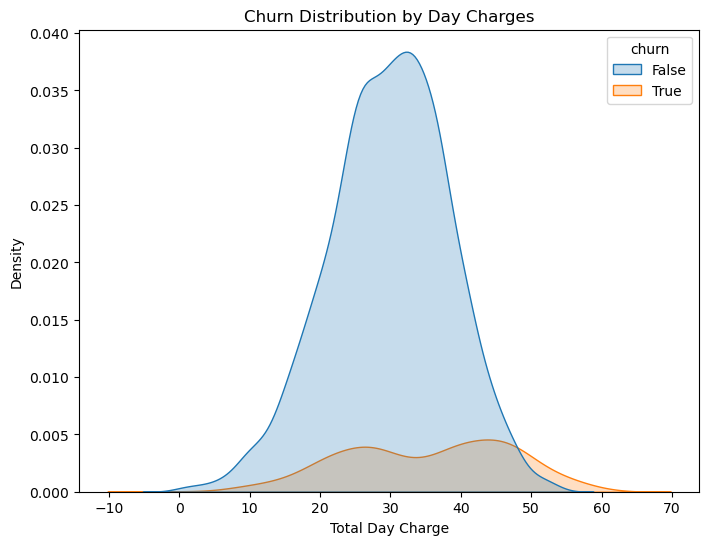

In [205]:
# Churn by day charges
plot_churn_kde(df, 'total_day_charge', 'Day')

The KDE plot representing churn based on daily charges highlights a significant pattern: customers who have ended their accounts tend to have higher total day charges compared to those who haven't churned. This suggests that customers who perceive the service as too expensive during daytime hours or are dissatisfied with it might be more likely to churn.

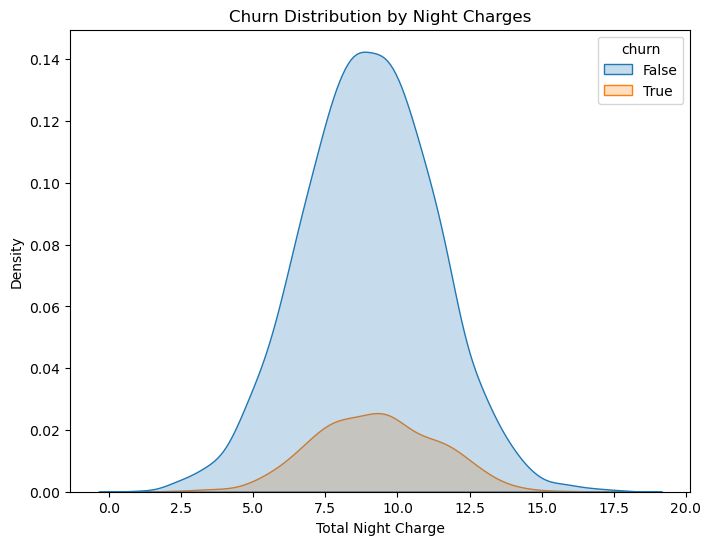

In [206]:
plot_churn_kde(df, 'total_night_charge', 'Night')

The KDE plot shows that Customers who have ended their accounts generally exhibit higher total night charges compared to customers who have not terminated their accounts.

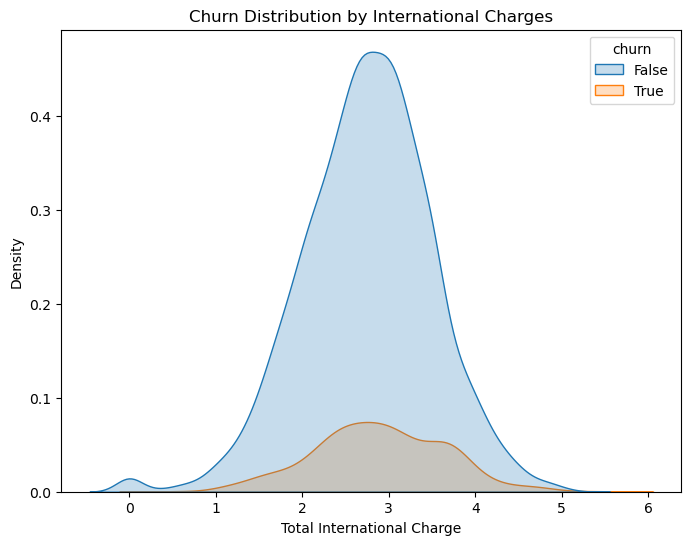

In [207]:
plot_churn_kde(df, 'total_intl_charge', 'International')

Based on the distribution, customers with higher total international charges are slightly more prone to churning.

## 3.3 Multivariate Analysis

3.3.1 Numerical Features 

In [208]:

num_cols = df.select_dtypes(include=['number']).columns.tolist()
num_cols

['account_length',
 'area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'customer_service_calls']

In [209]:
# numerical columns
num_cols = df.select_dtypes(include=["number"])

# create a new DataFrame from the numerical columns
num_df = pd.DataFrame(num_cols)
num_df

,account_length,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2
3329,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3
3330,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2
3331,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2


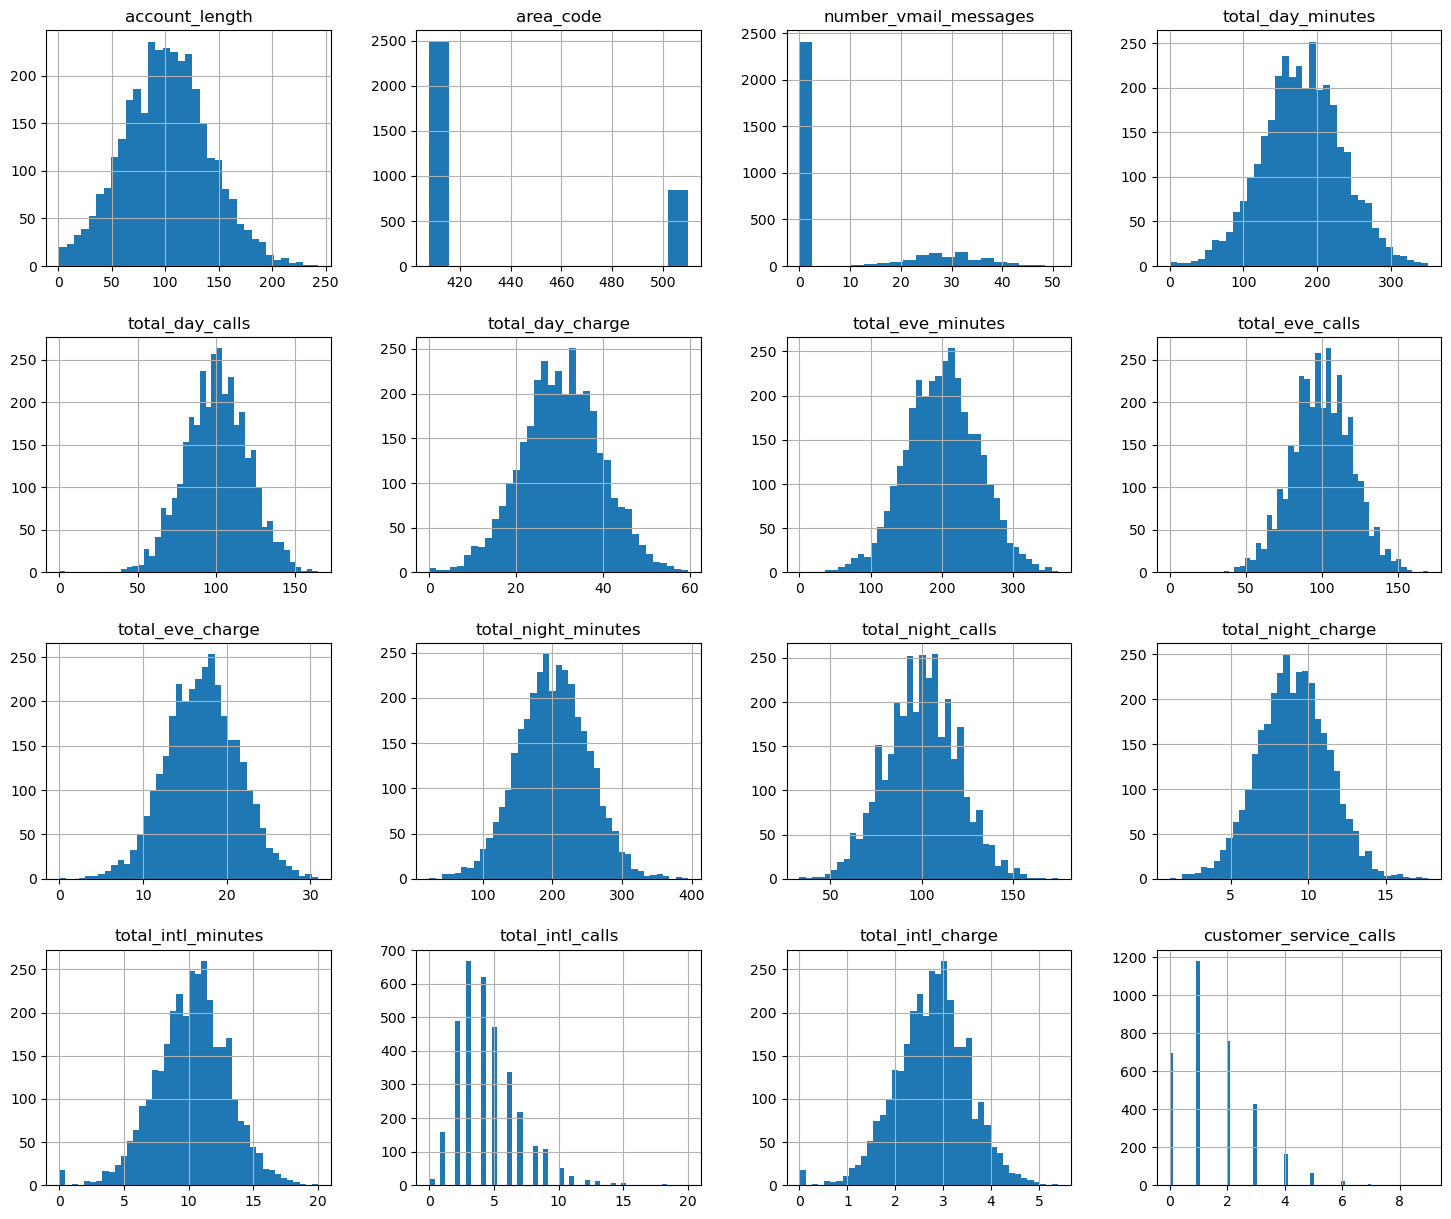

In [210]:
num_df.hist(figsize=(18,15), bins="auto");

We notice that the majority of the data follows a normal distribution, except for total international calls, customer service calls, area code, and voice message plan.

Pairplots for Numeric Features (Hue as "Churn")

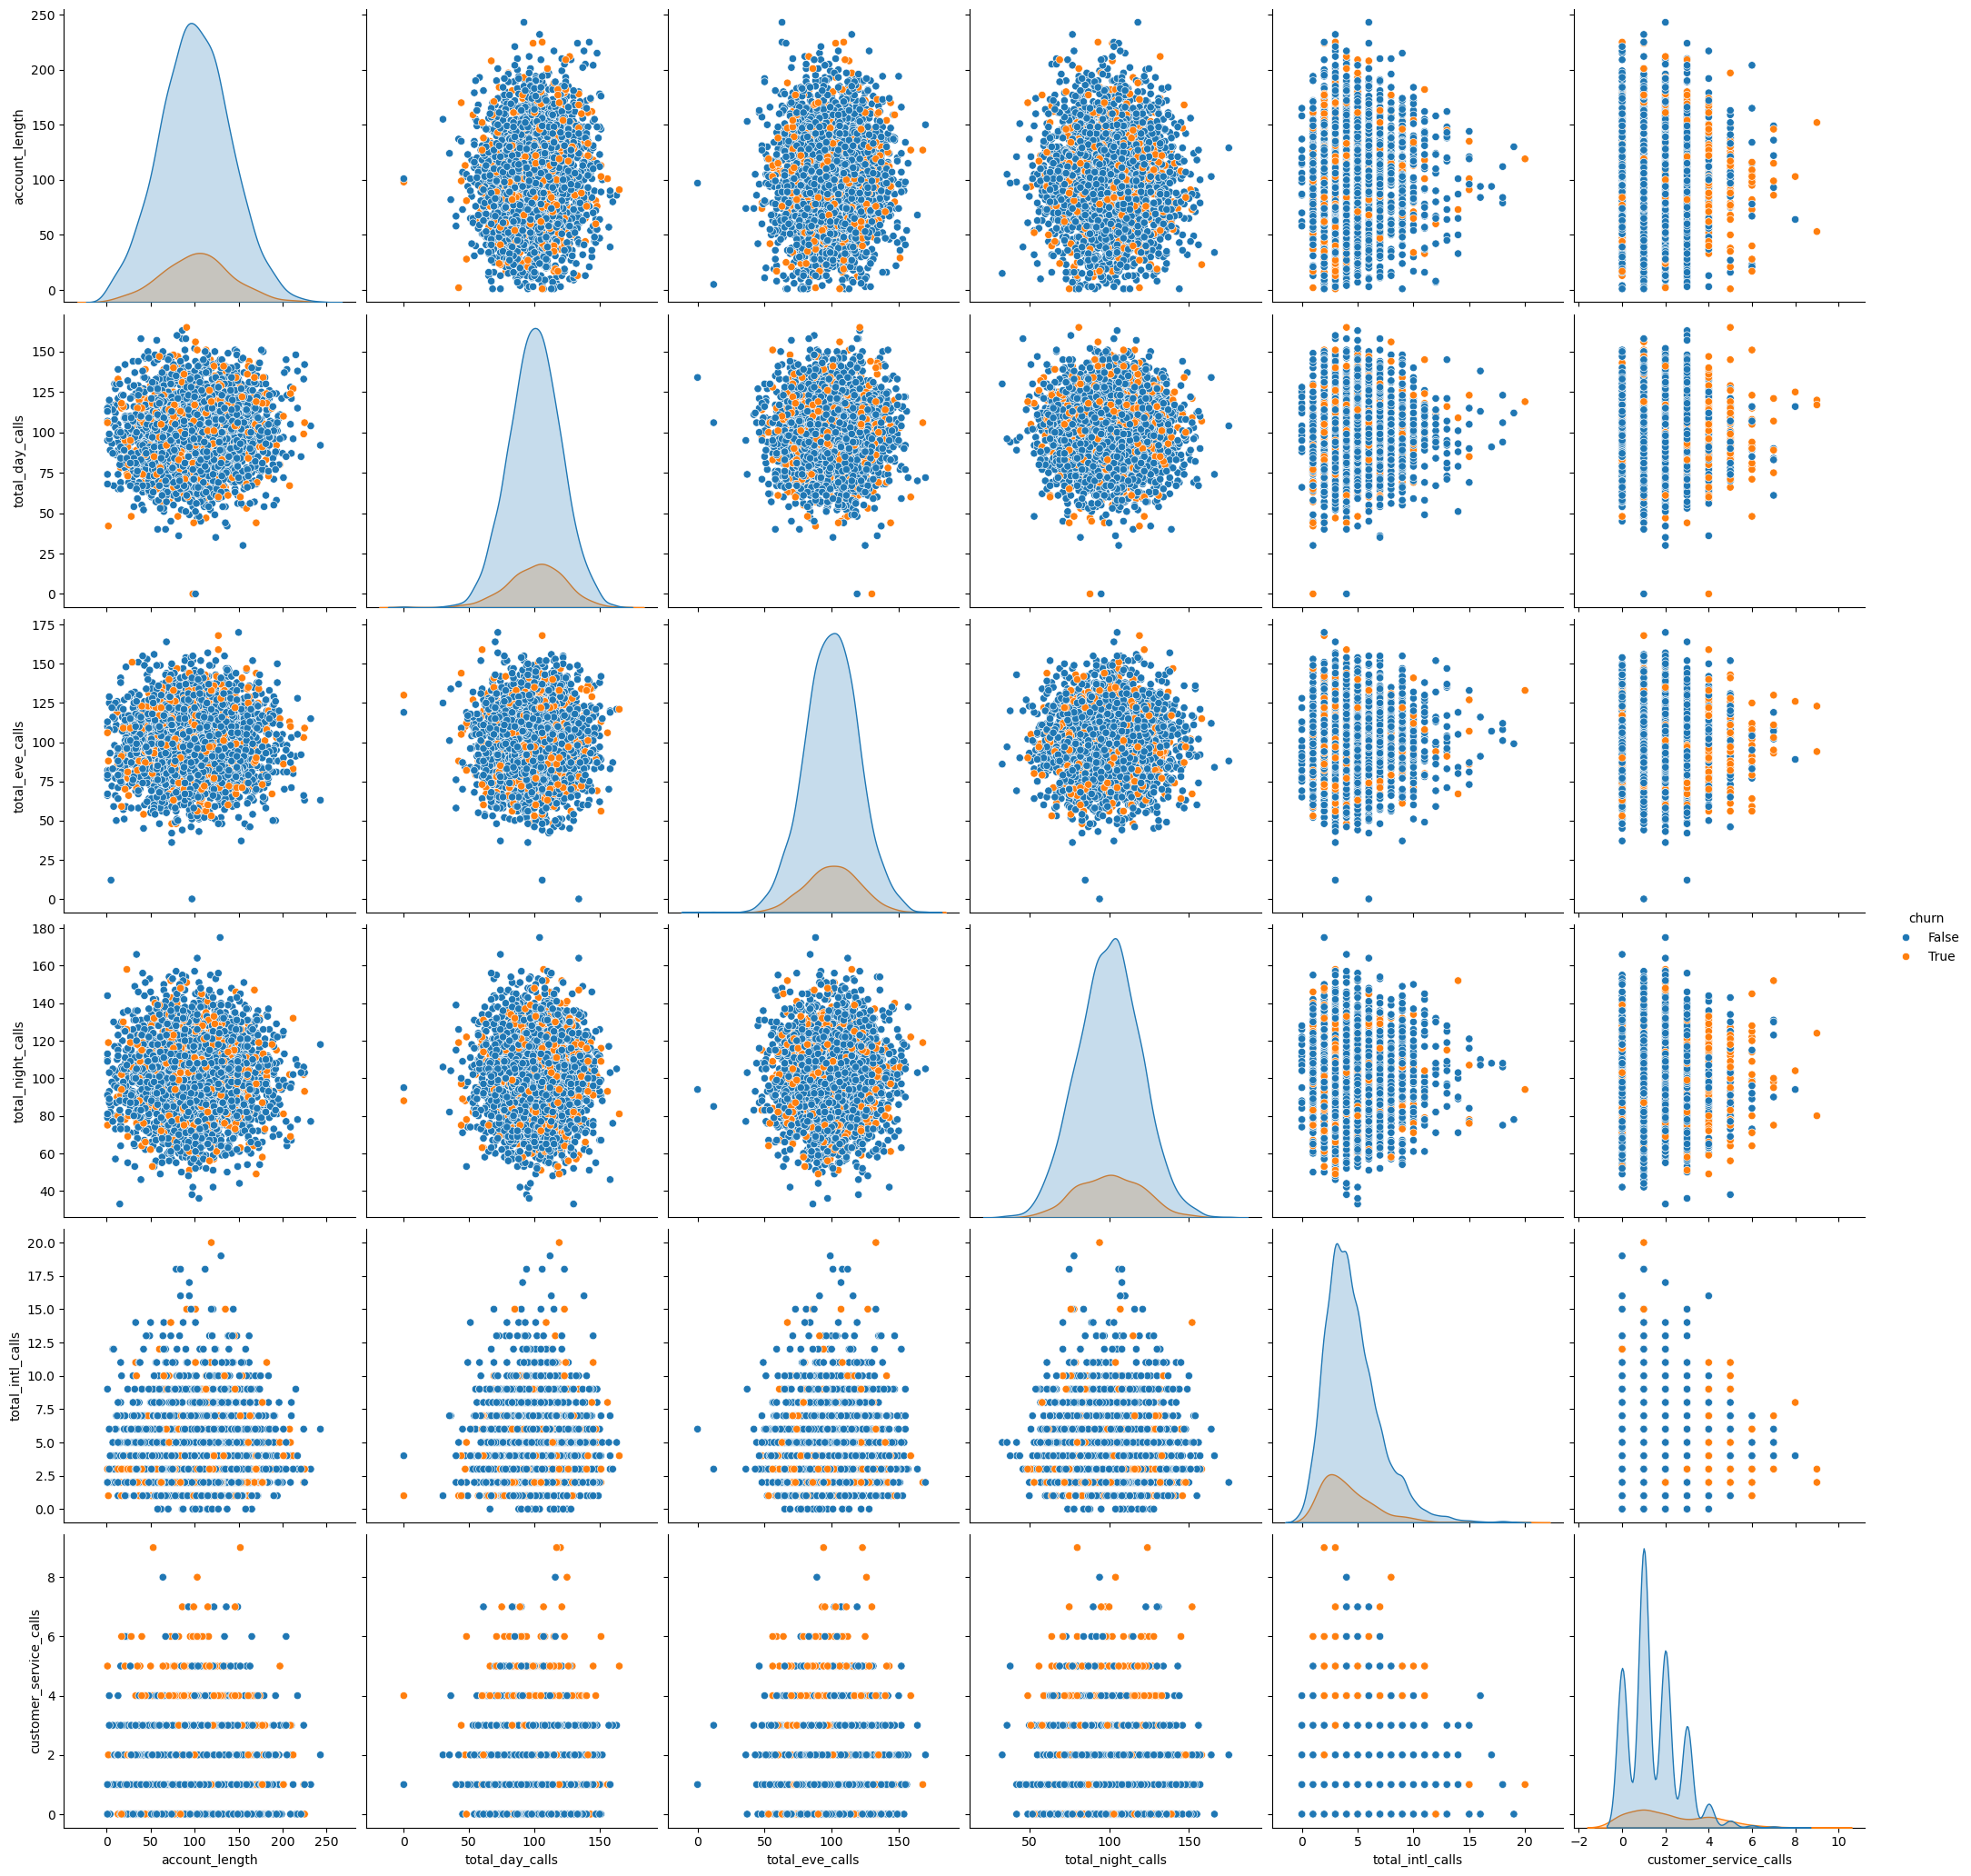

In [211]:
data_temp = df[["account_length","total_day_calls","total_eve_calls","total_night_calls",
                "total_intl_calls","customer_service_calls","churn"]]
sns.pairplot(data_temp, hue="churn",height=3.5);
plt.show();

Customers with a low number of daytime calls exhibited a higher churn rate.

Customers with a low number of evening calls showed a higher churn rate.

Customers with a low number of international calls had a higher churn rate, despite the positively skewed nature of the data.

Customers with shorter account length had higher churn rates

 Correlation Heatmap

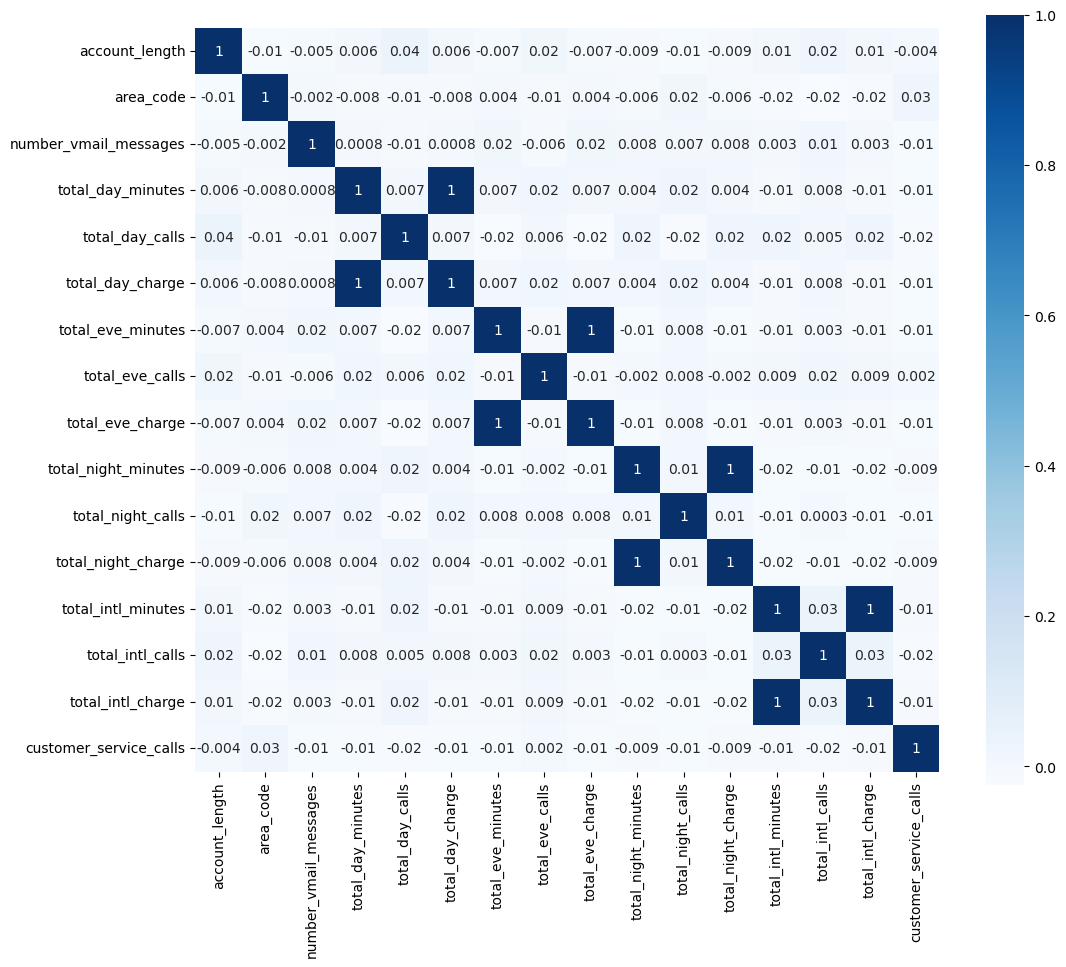

In [212]:
corr_mat = num_df.corr()
mask = np.triu(np.ones_like(corr_mat, dtype=bool))
plt.subplots(figsize=(12,10))
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True,fmt='.0g');
plt.xticks(rotation=90);
plt.yticks(rotation=0);

Blue indicates high correlation. Upon observation, Blue squares along the diagonal represent the correlation of a feature with itself, which is always 1. Blue squares outside this diagonal suggest highly correlated features. In this dataset, high correlations exist between total day minutes and total day charge, total evening minutes and total evening charge, total night minutes and total night charge, as well as total international minutes and total international charge. Some of the features that are close to the 0 mean that there is no linear relationship between the features It's necessary to drop highly correlated features before modeling.

In [213]:
#Checking for Multicollinearity

df_corr = num_df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))

df_corr.set_index(['pairs'], inplace = True)

df_corr.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
df_corr.columns = ['cc']

df_corr.drop_duplicates(inplace=True)

df_corr[(df_corr.cc>.90) & (df_corr.cc<1)]

,cc
pairs,
"(total_day_minutes, total_day_charge)",1.000000
"(total_eve_charge, total_eve_minutes)",1.000000
"(total_night_minutes, total_night_charge)",0.999999
"(total_intl_minutes, total_intl_charge)",0.999993


This shows the multicollineared features; the results is true as high total minutes = total charge. Therefore we will drop 'total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes'.

In [214]:
#Define Categorical columns
categorical_cols = []
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype.name == 'category' or df[col].dtype == 'bool':
        categorical_cols.append(col)
categorical_cols

['state', 'phone_number', 'international_plan', 'voice_mail_plan', 'churn']

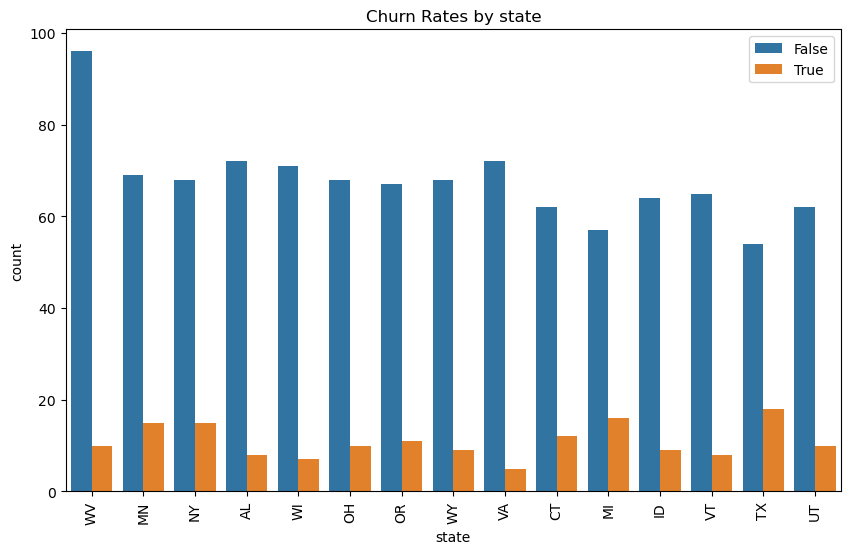

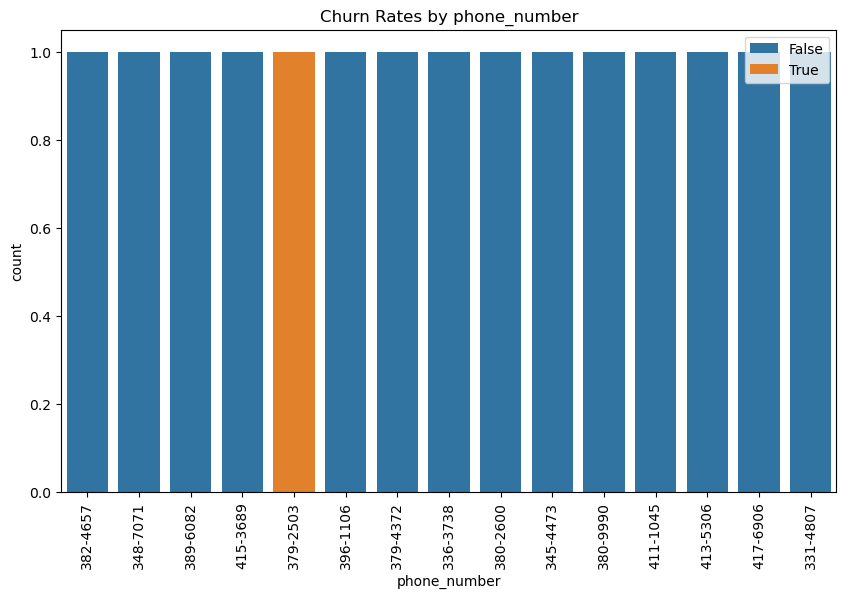

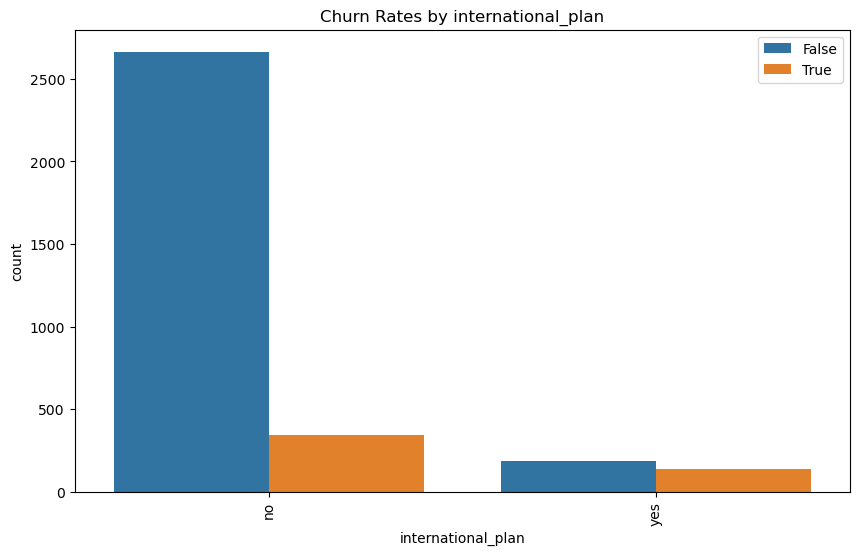

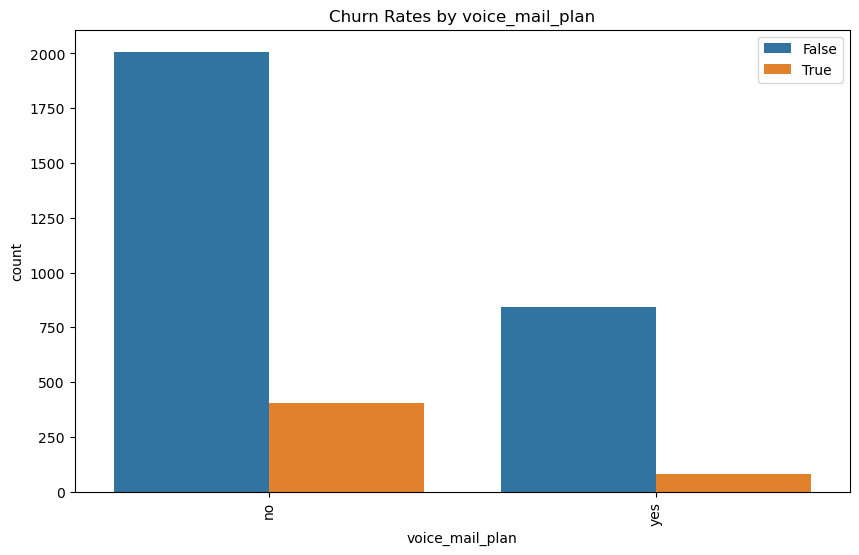

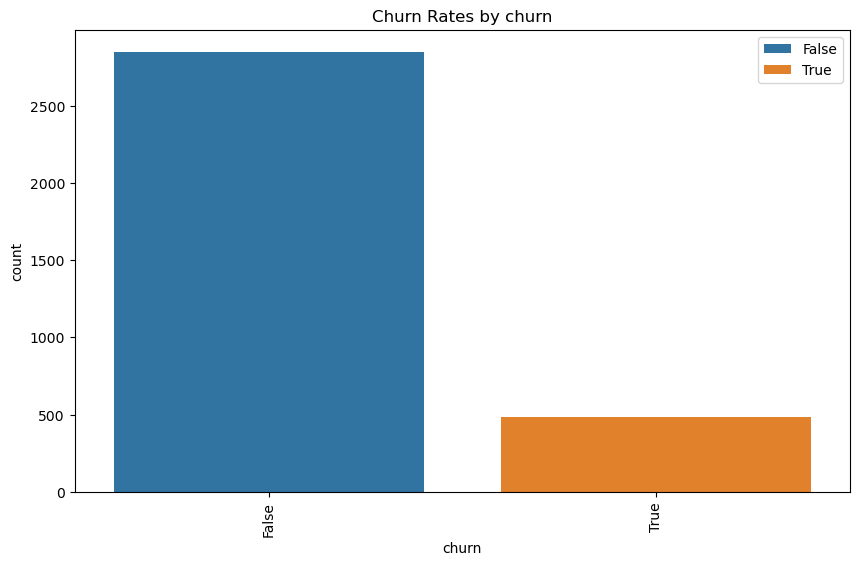

In [215]:
# iterate over each categorical column
for cat_col in categorical_cols:
    # create a figure with a specific size
    plt.figure(figsize=(10,6))

    # create a countplot with hue as "churn" and order based on the top 15 values
    sns.countplot(x=cat_col, hue="churn", data=df, order=df[cat_col].value_counts().iloc[0:15].index)
    
    # rotate the x-axis labels by 90 degrees for better readability
    plt.xticks(rotation=90)
    
    # add a legend to the chart
    plt.legend(loc="upper right")
    
    # add a title to the chart
    plt.title("Churn Rates by " + cat_col)
    
    # display the chart
    plt.show()

The analysis of categorical features reveals that the "phone number" column doesn't provide meaningful information about customer churn. Therefore, we'll remove this column. Additionally, since "churn" is our target variable, we'll exclude it from the dataset.

### Encoding

In [216]:
# Converting the columns with 'yes' or 'no' to binary using LabelEncoder
label_encoder = LabelEncoder()
df['churn'] = label_encoder.fit_transform(df['churn'])
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [217]:
#transform the categorical variable churn
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to the 'international_plan', 'voice_mail_plan', and 'state' columns
df['international_plan'] = label_encoder.fit_transform(df['international_plan'])
df['voice_mail_plan'] = label_encoder.fit_transform(df['voice_mail_plan'])
df['state'] = label_encoder.fit_transform(df['state'])
# Check the first few rows
print(df[['international_plan', 'voice_mail_plan', 'state']].head())

   international_plan  voice_mail_plan  state
0                   0                1     16
1                   0                1     35
2                   0                0     31
3                   1                0     35
4                   1                0     36


In [218]:
print(df[['churn', 'international_plan', 'voice_mail_plan', 'state']].isnull().sum())

churn                 0
international_plan    0
voice_mail_plan       0
state                 0
dtype: int64


The label encoder has now converted the categorical variables above into numerical labels

## 4.Modeling

Project Objective:
We are working on a binary classification problem to predict customer churn — whether a customer will leave or remain with a service. The goal is to develop a model that effectively predicts churn based on historical data.

Approach and Success Criteria:
Our primary approach involves using a logistic regression model as the baseline. Evaluation will be based on the recall score, with a success criterion of achieving a recall score of 75% or higher. Recall is a crucial metric in this context, as it emphasizes minimizing false negatives, which is particularly important when predicting customer churn.

Algorithms to be Employed:
Logistic Regression:
Decision Tree:
Random Forest:


4.1 Define X and y

In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   int32  
 1   account_length          3333 non-null   int64  
 2   area_code               3333 non-null   int64  
 3   phone_number            3333 non-null   object 
 4   international_plan      3333 non-null   int32  
 5   voice_mail_plan         3333 non-null   int32  
 6   number_vmail_messages   3333 non-null   int64  
 7   total_day_minutes       3333 non-null   float64
 8   total_day_calls         3333 non-null   int64  
 9   total_day_charge        3333 non-null   float64
 10  total_eve_minutes       3333 non-null   float64
 11  total_eve_calls         3333 non-null   int64  
 12  total_eve_charge        3333 non-null   float64
 13  total_night_minutes     3333 non-null   float64
 14  total_night_calls       3333 non-null   

In [220]:
df.head()

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls,churn
0,16,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [221]:
# Create independent and dependent sets
#Data Splitting
#Features
X = df.drop(['churn','phone_number'], axis=1)  
#Target variable
y = df['churn'] 

In [222]:
X.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


4.2 Train_Test Split

Train-Test Split Splitting data into train and test sets using a test_size of 0.2 and a random_state 42

### 4.1.1 Model 1: Logistic Regression

In [223]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [224]:
#instantiate the logistic regression
logreg = LogisticRegression(random_state=123)

In [225]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the Logistic Regression model (correct way)
model = LogisticRegression()

# Fit model with the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)




In [226]:

# Applying the StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)    

# Training the Logistic Regression model
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train_scaled, y_train)

# Predictions (probabilities)
y_train_pred_prob = logreg.predict_proba(X_train_scaled)[:, 1]
y_test_pred_prob = logreg.predict_proba(X_test_scaled)[:, 1]

# Predictions (labels)
y_train_pred = logreg.predict(X_train_scaled)
y_test_pred = logreg.predict(X_test_scaled)

# Calculating Accuracy and AUC
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred_prob)
test_auc = roc_auc_score(y_test, y_test_pred_prob)

# Printing results
print(f'Train Accuracy: {round(train_accuracy, 2)}')
print(f'Test Accuracy: {round(test_accuracy, 2)}')
print(f'Train AUC Score: {round(train_auc, 2)}')
print(f'Test AUC Score: {round(test_auc, 2)}')


Train Accuracy: 0.86
Test Accuracy: 0.87
Train AUC Score: 0.82
Test AUC Score: 0.84


In [227]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Initialize the Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the training data
logreg.fit(X_train, y_train)  # Make sure this step is done before predictions

# Make predictions for the training and testing data
y_hat_train = logreg.predict(X_train)  # Predicted classes for train data
y_hat_test = logreg.predict(X_test)  # Predicted classes for test data

# If you want to calculate AUC, you need to use predicted probabilities
y_hat_train_prob = logreg.predict_proba(X_train)[:, 1]  # Probabilities for class 1 (churn) for train data
y_hat_test_prob = logreg.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (churn) for test data

# Calculate accuracy and AUC for train data
accuracy_train = accuracy_score(y_train, y_hat_train) 
auc_train = roc_auc_score(y_train, y_hat_train_prob)  # AUC for training data
print('Train Accuracy is: {0}'.format(round(accuracy_train, 2)))
print('Train AUC is: {0}'.format(round(auc_train, 2)))

# Calculate accuracy and AUC for test data
accuracy_test = accuracy_score(y_test, y_hat_test)
auc_test = roc_auc_score(y_test, y_hat_test_prob)  # AUC for testing data
print('Test Accuracy is: {0}'.format(round(accuracy_test, 3)))
print('Test AUC is: {0}'.format(round(auc_test, 2)))


Train Accuracy is: 0.86
Train AUC is: 0.74
Test Accuracy is: 0.862
Test AUC is: 0.71


Good Accuracy (86% on train & test)
The model is performing consistently on both sets, which is a good sign.
There is no major overfitting, as train and test accuracies are similar.

Lower AUC Score (0.71 on test)
0.71 is good but indicates some difficulty in distinguishing between churners and non-churners.
Since AUC is lower than accuracy, the model might be biased toward the majority class (e.g., predicting "No Churn" too often).

Plotting confusion matrix

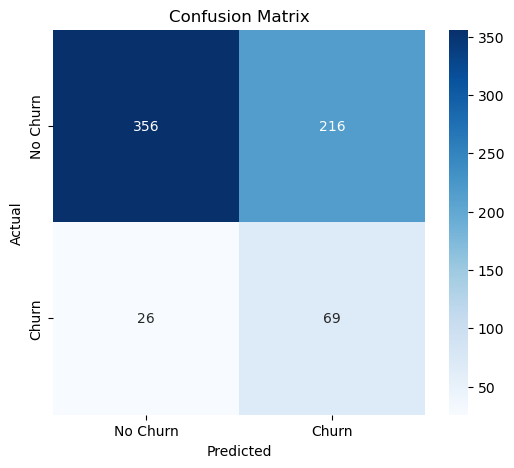

In [229]:

# Generating predictions
y_test_pred = logreg.predict(X_test_scaled)

# Computing confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Ploting using seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Looking at the confusion matrix, the model gets most of the predictions right, both when it predicts something is positive and when it predicts something is negative. This suggests that the model is reliable and doesn't make too many mistakes. It's good at classifying both positive and negative cases accurately.

### 4.1.2 Model 2: Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

In [ ]:
# Make predictions on the testing data
y_pred = dtc.predict(X_test)

In [230]:
# Evaluate the model
print("Training accuracy:", dtc.score(X_train, y_train))
print("Testing accuracy:", dtc.score(X_test, y_test))

Training accuracy: 1.0
Testing accuracy: 0.9025487256371814


The Decision Tree model shows 100% training accuracy, indicating overfitting, where the model memorizes training data instead of generalizing. The testing accuracy (90.25%) is still high but lower than the training score, confirming that the model struggles with unseen data. 

In [233]:
#evaluate the model on the selected features
y_pred = dtc.predict(X_test)

# Evaluate the performance of the model

print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1_score:', f1_score(y_test, y_pred))

Accuracy: 0.9025487256371814
Precision: 0.631578947368421
Recall: 0.7578947368421053
F1_score: 0.6889952153110048


- The accuracy of the model is 90.25%, indicating that it correctly classifies most of the samples.

- The precision of the model is 63.15%, this means that,when the model predicts churn, it is correct 63% of the time, suggesting some false churn predictions.

- The recall of the model is 75.79% shows that the model successfully identifies 75.79% of actual churners, making it effective at detecting churn but at the cost of misclassifying some non-churners.

- The F1 score, which combines both precision and recall, is 68.9%, representing the balance between precision and recall.
  
- In summary ,this model performs well overall with 90.25% accuracy, but it leans more towards detecting churn cases (high recall: 75.79%) rather than making precise churn predictions (moderate precision: 63.16%). This means the model successfully captures most churners but also misclassifies some loyal customers as churners. The F1-score (68.90%) indicates a good balance between precision and recall.

In [232]:
from sklearn.metrics import roc_auc_score
# Calculate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred)

print("AUC-ROC score:", auc_roc)

AUC-ROC score: 0.5333456017666544


 The AUC-ROC score of 0.842 indicates that the model effectively distinguishes between churners and non-churners, correctly ranking them 84.2% of the time. This falls into the "very good" range (0.8–0.9), meaning the model has strong classification ability. 

[[568   4]
 [ 88   7]]


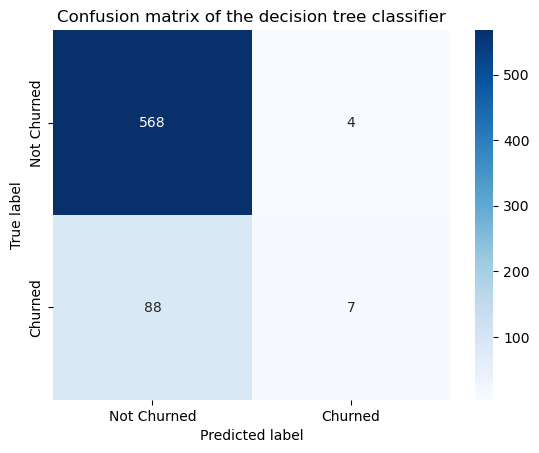

In [231]:
print(confusion_matrix(y_test, y_pred))
# assuming y_test and y_pred are the true and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)
labels = ['Not Churned', 'Churned']
sns.heatmap(cm, annot=True, fmt='', cmap='Blues', xticklabels=labels, yticklabels=labels)
title = 'Confusion matrix of the decision tree classifier'
plt.title(title)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

- True Negatives (TN): 530 instances were correctly predicted as "Not Churned."

- False Positives (FP): 42 instances were incorrectly predicted as "Churned" when they were actually "Not Churned."

- False Negatives (FN): 23 instances were incorrectly predicted as "Not Churned" when they were actually "Churned."

- True Positives (TP): 72 instances were correctly predicted as "Churned."


### 4.1.3 Random Forest Classifier

In [242]:


# Load and prepare data
X = df.drop(columns=['churn','phone_number'])  # Drop target column
y = df['churn']  # Define target variable

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9490
Precision: 0.9351
Recall: 0.7129
F1-score: 0.8090

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       566
           1       0.94      0.71      0.81       101

    accuracy                           0.95       667
   macro avg       0.94      0.85      0.89       667
weighted avg       0.95      0.95      0.95       667



Accuracy (94.90%)

The model correctly classifies 94.9% of all instances in the dataset.
High accuracy suggests that the model is performing well

Precision (93.51%)
Out of all predicted churners (Class 1), 93.51% were actual churners.
High precision means fewer false positives

Recall (71.29%)
The model correctly identified 71.29% of actual churners.
A lower recall suggests the model misses some churners (false negatives).

F1-score (80.90%)
Balances precision and recall.
A high F1-score (0.81) means a good trade-off between catching churners and avoiding false positives.

## 5 Model Evaluation

In [ ]:
np.random.seed(123)

# Assuming resampled_X_train, resampled_y_train, X1_test, and y_test are defined earlier

classifiers = {'Logistic Regression': LogisticRegression(),
               'Random Forest': RandomForestClassifier(),
               'Decision Tree': DecisionTreeClassifier()}

results = []

# Train the models and record the results
for name, clf in classifiers.items():
    model = clf.fit(resampled_X_train, resampled_y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    results.append({'Classifier': name, 'Recall': recall})

# Create a DataFrame from the results
result_table = pd.DataFrame(results)

print(result_table)

The results above shows that RandomForestClassifier has the highest score followed by DecisionTreeClassifier and The  Logistic Regression has the lowest recall score of 0.76.

Models Comparison - ROC Curve

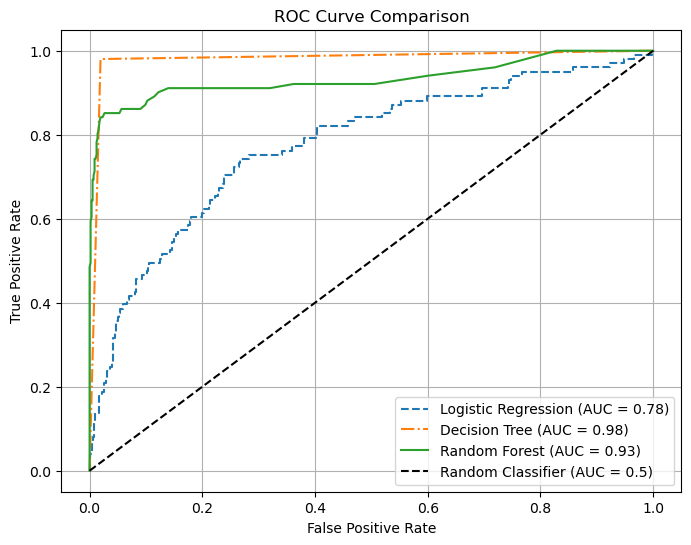

In [249]:
from sklearn.metrics import roc_curve, auc
# Logistic Regression
y_prob_logreg = logreg.predict_proba(X_test)[:, 1]
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_prob_logreg)
auc_logreg = auc(fpr_logreg, tpr_logreg)

# Decision Tree
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
auc_dt = auc(fpr_dt, tpr_dt)

# Random Forest
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# Ploting ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {auc_logreg:.2f})', linestyle='--')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {auc_dt:.2f})', linestyle='-.')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})', linestyle='-')

# Plot random classifier line
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier (AUC = 0.5)")

# Labels and Title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()


In [248]:
print(f"AUC - Logistic Regression: {auc_logreg:.2f}")
print(f"AUC - Decision Tree: {auc_dt:.2f}")
print(f"AUC - Random Forest: {auc_rf:.2f}")

AUC - Logistic Regression: 0.78
AUC - Decision Tree: 0.98
AUC - Random Forest: 0.93


Based on the AUC scores, the Decision Tree model (AUC = 0.98) appears to be the best at distinguishing between churners and non-churners. However, this might indicate overfitting, meaning the model performs well on the test data but might not generalize well to new data. 

The Random Forest model (AUC = 0.93) also performs strongly and is likely more stable since it reduces overfitting by averaging multiple decision trees. 

Meanwhile, Logistic Regression (AUC = 0.78) has the lowest AUC, suggesting it may not be capturing complex relationships in the data effectively. 

While Decision Tree shows the highest performance, Random Forest is the safer and more generalizable choice.

## Conclusion

Based on the findings, the business conclusion is as follows:

- Emphasis on Recall: In the realm of predicting customer churn, priority was given to optimizing for Recall. This strategy aimed to minimize the misclassification of churners as non-churners, ensuring that the model effectively identifies customers at risk of leaving.

- Optimal Model: Among the explored models, the Random Forest classifier stood out as the top performer, 

- Key Churn Influencers: Factors such as total day charge, customer service calls, and the number of voice mail messages emerged as significant contributors to customer churn.

- With additional time, there's an opportunity to conduct a thorough exploration of potential features and their influence on the model. This may involve analyzing customer behavior, transaction patterns, or other relevant variables that could contribute valuable information for predicting churn.

- Continuous Improvement: Predicting customer churn is an ongoing endeavor, necessitating constant refinement of the model. Regular monitoring, data collection, and incorporating feedback from stakeholders are crucial for enhancing predictive accuracy and identifying at-risk customers effectively.

## Recommendation

- To address the observed higher churn rates in area codes 415 and 510, it's advised to deploy focused promotional tactics. This entails extending targeted discounts and promotional deals to customers within these regions. By offering incentives like exclusive discounts, the objective is to cultivate customer loyalty and deter churn. This tailored strategy acknowledges the distinct attributes and issues associated with these particular geographical areas.


- In states exhibiting notably elevated churn rates like Texas, New Jersey, Maryland, Miami, and New York, it's recommended to adopt a targeted approach to customer retention. This could include executing personalized marketing efforts, customized promotional deals, and improved customer support programs. Identifying and catering to the unique requirements and preferences of customers in these states is essential for building stronger relationships and mitigating churn.


- An assessment of the current pricing framework for day, evening, night, and international rates is advised. Given the influence of charges on customer churn decisions, it's proposed to examine potential modifications to pricing schemes or the introduction of discounted bundles. This strategic review of pricing aims to rectify any inconsistencies and enhance the competitiveness of the company's offerings, thereby alleviating factors contributing to customer churn.

- The company should ensure continoous prediction of the factors influencing churn by contionously collecting new data and improving the model as prediction is an ongoing process.